In [21]:
import librosa
import matplotlib.pyplot as plt
from scipy import signal
import soundfile as sf
import numpy as np

In [22]:
record, N1 = librosa.load("record.wav")

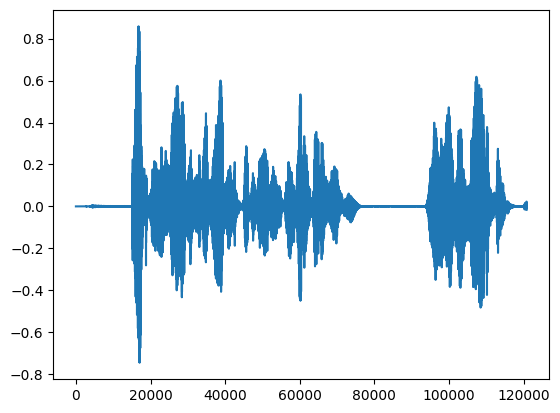

In [23]:
plt.plot(record)

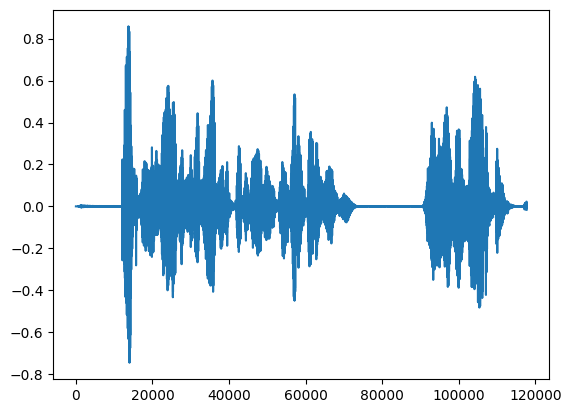

In [24]:
record, _ = librosa.effects.trim(record)
plt.plot(record)

In [25]:
Ns = [512, 1024, 2048, 4096]
Hs = [0.25, 0.5, 1]
Is = [16, 32, 64, 128, 256]
V = 0

In [26]:
def griffyn_lim(i, N, h, D):
    D_star = D
    for _ in range(i):
        Xt = librosa.istft(D_star, hop_length=h, n_fft=N)
        E = librosa.stft(Xt, hop_length=h, n_fft=N)
        phi = np.where(np.abs(E) == 0.0, 0, E / np.abs(E))
        D_star = D * phi
    Xt = librosa.istft(D_star, hop_length=h, n_fft=N)
    return np.real(Xt)

In [28]:
for N in Ns:
    for h in Hs:
        for i in Is:
            Y = librosa.stft(record, n_fft=N, hop_length=int(N * h))
            D = np.abs(Y)
            record_final = griffyn_lim(i, N, int(N * h), D)
            record_final = signal.lfilter([1], [1, -0.97], record_final)
            sf.write(f"N = {N}, h = {h}, i = {i}.wav", record_final, N1)

## Вывод

Вывод: чем меньше сдвиг, тем лучше звук; чем больше итераций применения алгоритма, тем лучше звук; размерность ДПФ особой роли не играет.

Аудиозаписи: https://disk.yandex.ru/d/v9yBFwkjEKuuCA